# **Computation of PPP Metrics for Control Run**

**Important metrics:**

- SH sea ice extent/volume
- regional sea ice extent/volume
- regional NPP, PCO2, SSS, SST
- gridpoint-level fields for sea ice concentration, SST, SSS, NPP, PCO2
- sea ice edge position (latitude at which sea ice concentration drops below 15%)

In [1]:
import os
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore", message="Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range")
warnings.filterwarnings("ignore", message="invalid value encountered in reduce")

import xarray as xr
import numpy as np
import math
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import hmei.processing as pcs
import hmei.visualization as vis

# Import Raw Data

In [2]:
write_rootdir = '/home/bbuchovecky/storage/so_predict_derived/'
reg_masks = xr.open_dataset(write_rootdir+'regional_global_masks.nc')

In [3]:
rootdir = '/home/bbuchovecky/storage/so_predict_derived/'
reg_masks = xr.open_dataset(rootdir+'regional_global_masks.nc')

In [4]:
## variable names
CN_INV = 'CN_INV'
NPP = 'NPP'
PCO2SURF = 'PCO2SURF'
SIE = 'SIE'
SIV = 'SIV'
SI_EDGE = 'SI_EDGE'
SSS = 'SSS'
SST = 'SST'
MLD ='MLD'

In [5]:
sst_raw = pcs.open_raw_ctrl(SST)

/local/projects/so_predict/esm2m_froelicher/CTRL/SST/sst_*.nc


In [6]:
sss_raw = pcs.open_raw_ctrl(SSS)

/local/projects/so_predict/esm2m_froelicher/CTRL/SSS/sss_*.nc


In [7]:
pco2_raw = pcs.open_raw_ctrl(PCO2SURF)

/local/projects/so_predict/esm2m_froelicher/CTRL/PCO2SURF/pco2surf_*.nc


In [8]:
npp_raw = pcs.open_raw_ctrl(NPP)

/local/projects/so_predict/esm2m_froelicher/CTRL/NPP/NPP_*.nc


In [9]:
cn_raw = pcs.open_raw_ctrl(CN_INV)

/local/projects/so_predict/esm2m_froelicher/CTRL/CN/CN_inv_*.nc


In [10]:
mld_raw = pcs.open_raw_ctrl(MLD)

/local/projects/so_predict/esm2m_froelicher/CTRL/MLD/mld_0*.nc


In [11]:
sie_raw = pcs.open_gridcell_ctrl(SIE)

/home/bbuchovecky/storage/so_predict_derived/CTRL/SIE/sie_ctrl_so_timeseries.nc


In [12]:
siv_raw = pcs.open_gridcell_ctrl(SIV)

/home/bbuchovecky/storage/so_predict_derived/CTRL/SIV/siv_ctrl_so_timeseries.nc


# ANNUAL

## Annual Mean
For each year, the area-weighted mean value for the specified region.

### Global

In [13]:
## global annual mean

sst_global_annual_mean = pcs.reg_annual_mean(sst_raw, 'sst') - 273.15
sss_global_annual_mean = pcs.reg_annual_mean(sss_raw, 'sss')
pco2_global_annual_mean = pcs.reg_annual_mean(pco2_raw, 'pco2surf')
npp_global_annual_mean = pcs.reg_annual_mean(npp_raw, 'NPP')
cn_global_annual_mean = pcs.reg_annual_mean(cn_raw, 'CN_INV')
sie_global_annual_mean = pcs.reg_annual_mean(sie_raw, 'SIE_area')
siv_global_annual_mean = pcs.reg_annual_mean(siv_raw, 'SIV_area')
mld_global_annual_mean = pcs.reg_annual_mean(mld_raw, 'mld')

In [14]:
write_rootdir = '/home/bbuchovecky/storage/so_predict_derived/'
subdir_ctrl = 'CTRL/'

## save mean data
def save_mean(ds, var, reg, time_scale):
    filename = var.lower()+'_'+reg.lower()+'_'+time_scale.lower()+'_mean.nc'
    ds.to_netcdf(write_rootdir+subdir_ctrl+var.upper()+'/'+filename)

save_mean(sst_global_annual_mean, 'sst', 'global', 'annual')
save_mean(sss_global_annual_mean, 'sss', 'global', 'annual')
save_mean(pco2_global_annual_mean, 'pco2surf', 'global', 'annual')
save_mean(npp_global_annual_mean, 'npp', 'global', 'annual')
save_mean(cn_global_annual_mean, 'cn_inv', 'global', 'annual')
save_mean(sie_global_annual_mean, 'sie', 'global', 'annual')
save_mean(siv_global_annual_mean, 'siv', 'global', 'annual')
save_mean(mld_global_annual_mean, 'mld', 'global', 'annual')

### Southern Ocean Regions

In [15]:
## Southern Ocean annual mean

sst_so_annual_mean  = []
sss_so_annual_mean  = []
pco2_so_annual_mean = []
npp_so_annual_mean  = []
cn_so_annual_mean   = []
sie_so_annual_mean  = []
siv_so_annual_mean  = []
mld_so_annual_mean = []

for reg in reg_masks.data_vars:
    sst_so_annual_mean.append(pcs.reg_annual_mean(sst_raw, 'sst', reg_masks, reg) - 273.15)
    sss_so_annual_mean.append(pcs.reg_annual_mean(sss_raw, 'sss', reg_masks, reg))
    pco2_so_annual_mean.append(pcs.reg_annual_mean(pco2_raw, 'pco2surf', reg_masks, reg))
    npp_so_annual_mean.append(pcs.reg_annual_mean(npp_raw, 'NPP', reg_masks, reg))
    cn_so_annual_mean.append(pcs.reg_annual_mean(cn_raw, 'CN_INV', reg_masks, reg))
    sie_so_annual_mean.append(pcs.reg_annual_mean(sie_raw, 'SIE_area', reg_masks, reg))
    siv_so_annual_mean.append(pcs.reg_annual_mean(siv_raw, 'SIV_area', reg_masks, reg))
    mld_so_annual_mean.append(pcs.reg_annual_mean(mld_raw, 'mld', reg_masks, reg))

In [16]:
## rename DataArrays to regional names (SouthernOcean, Weddell, etc.)

so_annual_mean = zip(sst_so_annual_mean,sss_so_annual_mean,pco2_so_annual_mean,npp_so_annual_mean,
                       cn_so_annual_mean,sie_so_annual_mean,siv_so_annual_mean,mld_so_annual_mean)

for (sst,sss,pco2,npp,cn,sie,siv,mld) in so_annual_mean:
    sst.name = sst.name.split('_')[0]
    sss.name = sss.name.split('_')[0]
    pco2.name = pco2.name.split('_')[0]
    npp.name = npp.name.split('_')[0]
    cn.name = cn.name.split('_')[0]
    sie.name = sie.name.split('_')[0]
    siv.name = siv.name.split('_')[0]
    mld.name = mld.name.split('_')[0]

In [17]:
## create Dataset

ds_sst_annual_mean = xr.merge(sst_so_annual_mean)
ds_sss_annual_mean = xr.merge(sss_so_annual_mean)
ds_pco2_annual_mean = xr.merge(pco2_so_annual_mean)
ds_npp_annual_mean = xr.merge(npp_so_annual_mean)
ds_cn_annual_mean = xr.merge(cn_so_annual_mean)
ds_sie_annual_mean = xr.merge(sie_so_annual_mean)
ds_siv_annual_mean = xr.merge(siv_so_annual_mean)
ds_mld_annual_mean = xr.merge(mld_so_annual_mean)

In [18]:
## set names

ds_sst_annual_mean.attrs['name'] = 'sst_so_annual_mean'
ds_sss_annual_mean.attrs['name'] = 'sss_so_annual_mean'
ds_pco2_annual_mean.attrs['name'] = 'pco2surf_so_annual_mean'
ds_npp_annual_mean.attrs['name'] = 'npp_so_annual_mean'
ds_cn_annual_mean.attrs['name'] = 'sic_so_annual_mean'
ds_sie_annual_mean.attrs['name'] = 'sie_so_annual_mean'
ds_siv_annual_mean.attrs['name'] = 'siv_so_annual_mean'
ds_mld_annual_mean.attrs['name'] = 'mld_so_annual_mean'

In [19]:
## save Datasets as NetCDF files

write_rootdir = '/home/bbuchovecky/storage/so_predict_derived/'
subdir_ctrl = 'CTRL/'

## save mean data
def save_mean(ds, var, reg, time_scale):
    filename = var.lower()+'_'+reg.lower()+'_'+time_scale.lower()+'_mean.nc'
    ds.to_netcdf(write_rootdir+subdir_ctrl+var.upper()+'/'+filename)

save_mean(ds_sst_annual_mean, 'sst', 'so', 'annual')
save_mean(ds_sss_annual_mean, 'sss', 'so', 'annual')
save_mean(ds_pco2_annual_mean, 'pco2surf', 'so', 'annual')
save_mean(ds_npp_annual_mean, 'npp', 'so', 'annual')
save_mean(ds_cn_annual_mean, 'cn_inv', 'so', 'annual')
save_mean(ds_sie_annual_mean, 'sie', 'so', 'annual')
save_mean(ds_siv_annual_mean, 'siv', 'so', 'annual')
save_mean(ds_mld_annual_mean, 'mld', 'so', 'annual')

# MONTHLY

## Monthly Mean
For each month, the area-weighted mean value for the specified region.

### Global

In [20]:
## global monthly mean

sst_global_monthly_mean = pcs.reg_monthly_mean(sst_raw, 'sst') - 273.15
sss_global_monthly_mean = pcs.reg_monthly_mean(sss_raw, 'sss')
pco2_global_monthly_mean = pcs.reg_monthly_mean(pco2_raw, 'pco2surf')
npp_global_monthly_mean = pcs.reg_monthly_mean(npp_raw, 'NPP')
cn_global_monthly_mean = pcs.reg_monthly_mean(cn_raw, 'CN_INV')
sie_global_monthly_mean = pcs.reg_monthly_mean(sie_raw, 'SIE_area')
siv_global_monthly_mean = pcs.reg_monthly_mean(siv_raw, 'SIV_area')
mld_global_monthly_mean = pcs.reg_monthly_mean(mld_raw, 'mld')

In [21]:
write_rootdir = '/home/bbuchovecky/storage/so_predict_derived/'
subdir_ctrl = 'CTRL/'

## save mean data
def save_mean(ds, var, reg, time_scale):
    filename = var.lower()+'_'+reg.lower()+'_'+time_scale.lower()+'_mean.nc'
    ds.to_netcdf(write_rootdir+subdir_ctrl+var.upper()+'/'+filename)

save_mean(sst_global_monthly_mean, 'sst', 'global', 'monthly')
save_mean(sss_global_monthly_mean, 'sss', 'global', 'monthly')
save_mean(pco2_global_monthly_mean, 'pco2surf', 'global', 'monthly')
save_mean(npp_global_monthly_mean, 'npp', 'global', 'monthly')
save_mean(cn_global_monthly_mean, 'cn_inv', 'global', 'monthly')
save_mean(sie_global_monthly_mean, 'sie', 'global', 'monthly')
save_mean(siv_global_monthly_mean, 'siv', 'global', 'monthly')
save_mean(mld_global_monthly_mean, 'mld', 'global', 'monthly')

### Southern Ocean Regions

In [22]:
## regional monthly mean

sst_so_monthly_mean  = []
sss_so_monthly_mean  = []
pco2_so_monthly_mean = []
npp_so_monthly_mean  = []
cn_so_monthly_mean   = []
sie_so_monthly_mean  = []
siv_so_monthly_mean  = []
mld_so_monthly_mean = []

for reg in reg_masks.data_vars:
    sst_so_monthly_mean.append(pcs.reg_monthly_mean(sst_raw, 'sst', reg_masks, reg) - 273.15)
    sss_so_monthly_mean.append(pcs.reg_monthly_mean(sss_raw, 'sss', reg_masks, reg))
    pco2_so_monthly_mean.append(pcs.reg_monthly_mean(pco2_raw, 'pco2surf', reg_masks, reg))
    npp_so_monthly_mean.append(pcs.reg_monthly_mean(npp_raw, 'NPP', reg_masks, reg))
    cn_so_monthly_mean.append(pcs.reg_monthly_mean(cn_raw, 'CN_INV', reg_masks, reg))
    sie_so_monthly_mean.append(pcs.reg_monthly_mean(sie_raw, 'SIE_area', reg_masks, reg))
    siv_so_monthly_mean.append(pcs.reg_monthly_mean(siv_raw, 'SIV_area', reg_masks, reg))
    mld_so_monthly_mean.append(pcs.reg_monthly_mean(mld_raw, 'mld', reg_masks, reg))

In [23]:
## rename DataArrays to regional names (SouthernOcean, Weddell, etc.)

so_monthly_mean = zip(sst_so_monthly_mean,sss_so_monthly_mean,pco2_so_monthly_mean,npp_so_monthly_mean,
                       cn_so_monthly_mean,sie_so_monthly_mean,siv_so_monthly_mean,mld_so_monthly_mean)

for (sst,sss,pco2,npp,cn,sie,siv,mld) in so_monthly_mean:
    sst.name = sst.name.split('_')[0]
    sss.name = sss.name.split('_')[0]
    pco2.name = pco2.name.split('_')[0]
    npp.name = npp.name.split('_')[0]
    cn.name = cn.name.split('_')[0]
    sie.name = sie.name.split('_')[0]
    siv.name = siv.name.split('_')[0]
    mld.name = mld.name.split('_')[0]

In [24]:
## create Dataset

ds_sst_monthly_mean = xr.merge(sst_so_monthly_mean)
ds_sss_monthly_mean = xr.merge(sss_so_monthly_mean)
ds_pco2_monthly_mean = xr.merge(pco2_so_monthly_mean)
ds_npp_monthly_mean = xr.merge(npp_so_monthly_mean)
ds_cn_monthly_mean = xr.merge(cn_so_monthly_mean)
ds_sie_monthly_mean = xr.merge(sie_so_monthly_mean)
ds_siv_monthly_mean = xr.merge(siv_so_monthly_mean)
ds_mld_monthly_mean = xr.merge(mld_so_monthly_mean)

In [25]:
## set names

ds_sst_monthly_mean.attrs['name'] = 'sst_so_monthly_mean'
ds_sss_monthly_mean.attrs['name'] = 'sss_so_monthly_mean'
ds_pco2_monthly_mean.attrs['name'] = 'pco2surf_so_monthly_mean'
ds_npp_monthly_mean.attrs['name'] = 'npp_so_monthly_mean'
ds_cn_monthly_mean.attrs['name'] = 'sic_so_monthly_mean'
ds_sie_monthly_mean.attrs['name'] = 'sie_so_monthly_mean'
ds_siv_monthly_mean.attrs['name'] = 'siv_so_monthly_mean'
ds_mld_monthly_mean.attrs['name'] = 'mld_so_monthly_mean'

In [26]:
## save Datasets as NetCDF files

write_rootdir = '/home/bbuchovecky/storage/so_predict_derived/'
subdir_ctrl = 'CTRL/'

## save mean data
def save_mean(ds, var, reg, time_scale):
    filename = var.lower()+'_'+reg.lower()+'_'+time_scale.lower()+'_mean.nc'
    ds.to_netcdf(write_rootdir+subdir_ctrl+var.upper()+'/'+filename)

save_mean(ds_sst_monthly_mean, 'sst', 'so', 'monthly')
save_mean(ds_sss_monthly_mean, 'sss', 'so', 'monthly')
save_mean(ds_pco2_monthly_mean, 'pco2surf', 'so', 'monthly')
save_mean(ds_npp_monthly_mean, 'npp', 'so', 'monthly')
save_mean(ds_cn_monthly_mean, 'cn_inv', 'so', 'monthly')
save_mean(ds_sie_monthly_mean, 'sie', 'so', 'monthly')
save_mean(ds_siv_monthly_mean, 'siv', 'so', 'monthly')
save_mean(ds_mld_monthly_mean, 'mld', 'so', 'monthly')

## Monthly Anomaly
Remove the seasonal cycle from the monthly mean timeseries.

### Global

In [27]:
write_rootdir = '/home/bbuchovecky/storage/so_predict_derived/'
subdir_ctrl = 'CTRL/'

def open_mean(var, reg, time_scale):
    write_rootdir = '/home/bbuchovecky/storage/so_predict_derived/'
    subdir_ctrl = 'CTRL/'
    filename = var.lower()+'_'+reg.lower()+'_'+time_scale.lower()+'_mean.nc'
    return xr.open_dataset(write_rootdir+subdir_ctrl+var.upper()+'/'+filename)

In [28]:
sst_global_monthly_mean = open_mean('sst', 'global', 'monthly')
sss_global_monthly_mean = open_mean('sss', 'global', 'monthly')
pco2_global_monthly_mean = open_mean('pco2surf', 'global', 'monthly')
npp_global_monthly_mean = open_mean('npp', 'global', 'monthly')
cn_global_monthly_mean = open_mean('cn_inv', 'global', 'monthly')
sie_global_monthly_mean = open_mean('sie', 'global', 'monthly')
siv_global_monthly_mean = open_mean('siv', 'global', 'monthly')
mld_global_monthly_mean = open_mean('mld', 'global', 'monthly')

In [29]:
sst_global_monthly_anom = pcs.reg_monthly_anom(sst_global_monthly_mean)
sss_global_monthly_anom = pcs.reg_monthly_anom(sss_global_monthly_mean)
pco2_global_monthly_anom = pcs.reg_monthly_anom(pco2_global_monthly_mean)
npp_global_monthly_anom = pcs.reg_monthly_anom(npp_global_monthly_mean)
cn_global_monthly_anom = pcs.reg_monthly_anom(cn_global_monthly_mean)
sie_global_monthly_anom = pcs.reg_monthly_anom(sie_global_monthly_mean)
siv_global_monthly_anom = pcs.reg_monthly_anom(siv_global_monthly_mean)
mld_global_monthly_anom = pcs.reg_monthly_anom(mld_global_monthly_mean)

In [30]:
write_rootdir = '/home/bbuchovecky/storage/so_predict_derived/'
subdir_ctrl = 'CTRL/'

## save mean data
def save_anom(ds, var, reg, time_scale):
    filename = var.lower()+'_'+reg.lower()+'_'+time_scale.lower()+'_anom.nc'
    ds.to_netcdf(write_rootdir+subdir_ctrl+var.upper()+'/'+filename)

save_anom(sst_global_monthly_anom, 'sst', 'global', 'monthly')
save_anom(sss_global_monthly_anom, 'sss', 'global', 'monthly')
save_anom(pco2_global_monthly_anom, 'pco2surf', 'global', 'monthly')
save_anom(npp_global_monthly_anom, 'npp', 'global', 'monthly')
save_anom(cn_global_monthly_anom, 'cn_inv', 'global', 'monthly')
save_anom(sie_global_monthly_anom, 'sie', 'global', 'monthly')
save_anom(siv_global_monthly_anom, 'siv', 'global', 'monthly')
save_anom(mld_global_monthly_anom, 'mld', 'global', 'monthly')

### Southern Ocean Regions

In [31]:
write_rootdir = '/home/bbuchovecky/storage/so_predict_derived/'
subdir_ctrl = 'CTRL/'

def open_mean(var, reg, time_scale):
    write_rootdir = '/home/bbuchovecky/storage/so_predict_derived/'
    subdir_ctrl = 'CTRL/'
    filename = var.lower()+'_'+reg.lower()+'_'+time_scale.lower()+'_mean.nc'
    return xr.open_dataset(write_rootdir+subdir_ctrl+var.upper()+'/'+filename)

In [32]:
sst_so_monthly_mean = open_mean('sst', 'so', 'monthly')
sss_so_monthly_mean = open_mean('sss', 'so', 'monthly')
pco2_so_monthly_mean = open_mean('pco2surf', 'so', 'monthly')
npp_so_monthly_mean = open_mean('npp', 'so', 'monthly')
cn_so_monthly_mean = open_mean('cn_inv', 'so', 'monthly')
sie_so_monthly_mean = open_mean('sie', 'so', 'monthly')
siv_so_monthly_mean = open_mean('siv', 'so', 'monthly')
mld_so_monthly_mean = open_mean('mld', 'so', 'monthly')

In [33]:
sst_so_monthly_anom = pcs.reg_monthly_anom(sst_so_monthly_mean)
sss_so_monthly_anom = pcs.reg_monthly_anom(sss_so_monthly_mean)
pco2_so_monthly_anom = pcs.reg_monthly_anom(pco2_so_monthly_mean)
npp_so_monthly_anom = pcs.reg_monthly_anom(npp_so_monthly_mean)
cn_so_monthly_anom = pcs.reg_monthly_anom(cn_so_monthly_mean)
sie_so_monthly_anom = pcs.reg_monthly_anom(sie_so_monthly_mean)
siv_so_monthly_anom = pcs.reg_monthly_anom(siv_so_monthly_mean)
mld_so_monthly_anom = pcs.reg_monthly_anom(mld_so_monthly_mean)

In [34]:
write_rootdir = '/home/bbuchovecky/storage/so_predict_derived/'
subdir_ctrl = 'CTRL/'

def save_anom(ds, var, reg, time_scale):
    filename = var.lower()+'_'+reg.lower()+'_'+time_scale.lower()+'_anom.nc'
    ds.to_netcdf(write_rootdir+subdir_ctrl+var.upper()+'/'+filename)

save_anom(sst_so_monthly_anom, 'sst', 'so', 'monthly')
save_anom(sss_so_monthly_anom, 'sss', 'so', 'monthly')
save_anom(pco2_so_monthly_anom, 'pco2surf', 'so', 'monthly')
save_anom(npp_so_monthly_anom, 'npp', 'so', 'monthly')
save_anom(cn_so_monthly_anom, 'cn_inv', 'so', 'monthly')
save_anom(sie_so_monthly_anom, 'sie', 'so', 'monthly')
save_anom(siv_so_monthly_anom, 'siv', 'so', 'monthly')
save_anom(mld_so_monthly_anom, 'mld', 'so', 'monthly')

In [38]:
write_rootdir = '/home/bbuchovecky/storage/so_predict_derived/'
subdir_ctrl = 'CTRL/'

pcs.dir_inspect(write_rootdir+subdir_ctrl+'SST')

['SST_raw',
 'ocean.static.nc',
 'sst_ctrl_global_anomaly.nc',
 'sst_ctrl_global_climatology.nc',
 'sst_ctrl_global_variance.nc',
 'sst_ctrl_so_anomaly.nc',
 'sst_ctrl_so_climatology.nc',
 'sst_ctrl_so_variance.nc',
 'sst_global_annual_mean.nc',
 'sst_global_monthly_anom.nc',
 'sst_global_monthly_mean.nc',
 'sst_so_annual_mean.nc',
 'sst_so_monthly_anom.nc',
 'sst_so_monthly_mean.nc']

In [64]:
x = xr.open_dataset(write_rootdir+subdir_ctrl+'MLD/mld_so_annual_mean.nc')

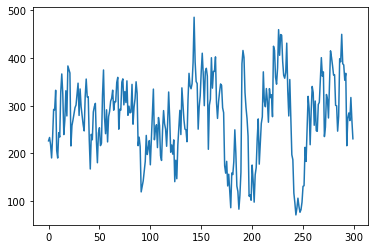

In [66]:
plt.plot(np.arange(0,300), x['Weddell'])

In [67]:
y = xr.open_dataset(write_rootdir+subdir_ctrl+'MLD/mld_so_monthly_anom.nc')

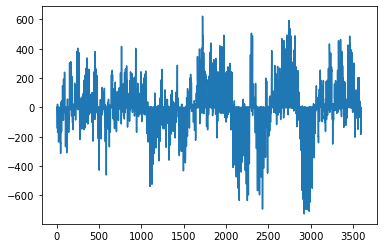

In [68]:
plt.plot(np.arange(0,3600), y['Weddell'])

# Misc

NameError: name 'np_sst_anom_so' is not defined

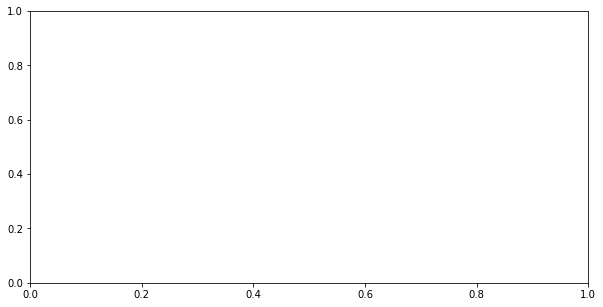

In [35]:
ens_yrs = np.array([22,64,106,170,232,295])
ens_mths = ens_yrs * 12

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(0,3600), np_sst_anom_so)
ax.set(xlim=[0,3600], xticks=ens_mths, xticklabels=ens_yrs);

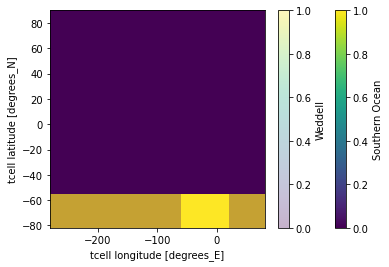

In [71]:
reg_masks['SouthernOcean'].plot()
reg_masks['Weddell'].plot(alpha=0.3)

In [78]:
xr.open_dataset(write_rootdir+subdir_ctrl+'SIE/sie_ctrl_so_timeseries.nc')

<xarray.Dataset>
Dimensions:       (month: 12, time: 3600, xt_ocean: 360, yt_ocean: 200)
Coordinates:
  * time          (time) object 0001-01-16 12:00:00 ... 0300-12-16 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yt_ocean      (yt_ocean) float64 -81.5 -80.5 -79.5 -78.5 ... 87.5 88.5 89.5
    geolat_t      (yt_ocean, xt_ocean) float32 ...
    geolon_t      (yt_ocean, xt_ocean) float32 ...
  * month         (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    SIE           (time) float32 ...
    SIE_area      (time, yt_ocean, xt_ocean) float32 ...
    SIE_clim      (month) float32 ...
    SIE_anom      (time) float32 ...
    SIE_variance  (month) float32 ...
Attributes:
    description:  timeseries of sea ice extent metrics

In [77]:
pcs.dir_inspect(write_rootdir+subdir_ctrl+'SIE')

['CN_raw',
 'ocean.static.nc',
 'sie_ctrl_so_binary.nc',
 'sie_ctrl_so_timeseries.nc',
 'sie_global_annual_mean.nc',
 'sie_global_monthly_anom.nc',
 'sie_global_monthly_mean.nc',
 'sie_so_annual_mean.nc',
 'sie_so_monthly_anom.nc',
 'sie_so_monthly_mean.nc']